# Projeto: Ligações para o 911

Para este projeto estaremos analisando alguns dados de chamadas para o 911 do [Kaggle](https://www.kaggle.com/mchirico/montcoalert). Os dados contém os seguintes campos:

* lat: Variável String, Latitude
* lng: Variável String, Longitude
* desc: Variável String, Descrição da Chamada de Emergência
* zip: Variável String, CEP
* título: Variável String, Título
* timeStamp: Variável String, AAAA-MM-DD HH: MM: SS
* twp: Variável String, Township
* addr: Variável String, Endereço
* e: Variável String, variável Dummy (sempre 1)

Simplesmente acompanhe este notebook e tente completar as instruções ou responder as perguntas em negrito usando suas habilidades Python e Data Science!

## Dados e Configuração

**Importar numpy e pandas**

In [94]:
import pandas as pd
import numpy as np

**Importe as bibliotecas de visualização e configure% matplotlib inline.**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Leia o arquivo csv como um dataframe chamado df**

In [3]:
df = pd.read_csv("911.csv")

**Verifique a info() do df**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


**Verifique o cabeçalho do df**

In [40]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu


## Perguntas básicas

**Quais são os top 5 CEPs nas chamadas 911?**

In [6]:
df['zip'].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

**Quais são os 5 principais municípios nas chamadas 911?**

In [7]:
df['twp'].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

**Dê uma olhada na coluna 'title'. Quantos códigos de título exclusivos existem?**

In [8]:
df['title'].nunique()

148

## Criando novos recursos

**Na coluna "title" existem "Razões / Departamentos" especificados antes do código do título. Estes são "EMS(Serviços Médicos de Emergência)", "Fire(serviços de combate a incêndios) " e "Traffic(Serviços de emergência de Tráfego)". Use .apply () com uma expressão lambda personalizada para criar uma nova coluna chamada "Razão" que contém esse valor de string.**

**Por exemplo, se o valor da coluna do título for EMS: BACK PAINS / BLESSOR, o valor da coluna Reason seria EMS.**

In [9]:
#Um exemplo da quebra que queremos realizar usando o método .split()
df['title'].iloc[0].split(':')[0]

'EMS'

In [10]:
#Nova coluna
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [92]:
df['Reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
663517    Traffic
663518        EMS
663519        EMS
663520       Fire
663521    Traffic
Name: Reason, Length: 663522, dtype: object

**Qual é o motivo mais comum para uma chamada do 911 com base nessa nova coluna?**

In [11]:
df['Reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

**Agora use Seaborn para criar um countplot de chamadas 911 baseadas nesta nova coluna.**

<Axes: xlabel='Reason', ylabel='count'>

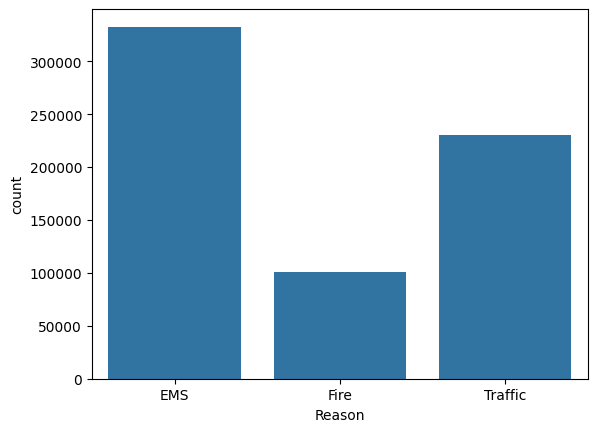

In [12]:
sns.countplot(x='Reason', data = df)

**Agora vamos começar a focar em informações de tempo. Qual é o tipo de dados dos objetos na coluna timeStamp?**

In [13]:
type(df['timeStamp'].iloc[1])

str

**Você deveria ter notado que esses timestamps ainda são strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) para converter a coluna de strings em objetos DateTime.**

In [14]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [15]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

**Agora você pode pegar atributos específicos de um objeto Datetime chamando-os. Por exemplo:**

    time = df['timeStamp'].iloc[0]
    time.hour

**Você pode usar o método de consulta de funções do Jupyter (Tab) para explorar os vários atributos que você pode chamar. Agora que a coluna timestamp é realmente objetos DateTime, use .apply () para criar 3 novas colunas chamadas Hour, Month e Day of Week. Você criará essas colunas com base na coluna timeStamp, consulte as soluções se você ficar preso nesta etapa.**

In [16]:
time = df['timeStamp'].iloc[0]

In [17]:
time.hour

17

In [18]:
#criando a coluna 'Hour'
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
#df['Hour']

In [19]:
#criando a coluna 'Month'
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
#df['Month']

In [20]:
#criando a coluna 'Day of Week'
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)
#df['Day of Week']

**Observe como o dia da demana é um número inteiro de 0-6. Use o .map () com este dicionário para mapear os nomes das seqüências reais para o dia da semana:**

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [21]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [22]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [23]:
df['Day of Week']

0         Thu
1         Thu
2         Thu
3         Thu
4         Thu
         ... 
663517    Wed
663518    Wed
663519    Wed
663520    Wed
663521    Wed
Name: Day of Week, Length: 663522, dtype: object

**Agora use Seaborn para criar um countplot da coluna "Day of Week" com a tonalidade baseada na coluna Reason.**

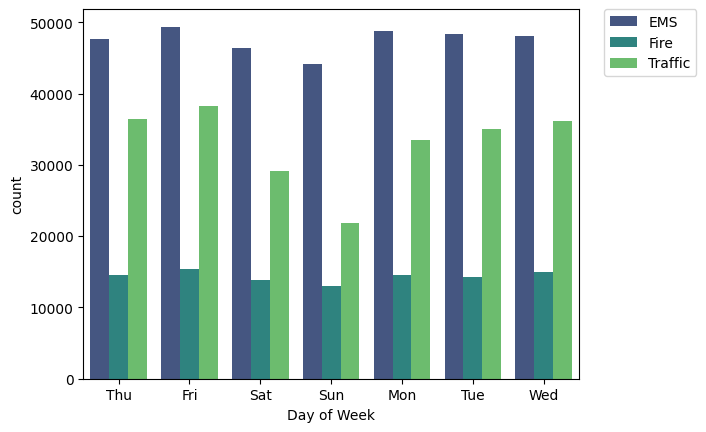

In [44]:
sns.countplot(x='Day of Week', data=df, hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)  # Ajuste a posição da legenda conforme necessário

**Agora faça o mesmo para o mês:**

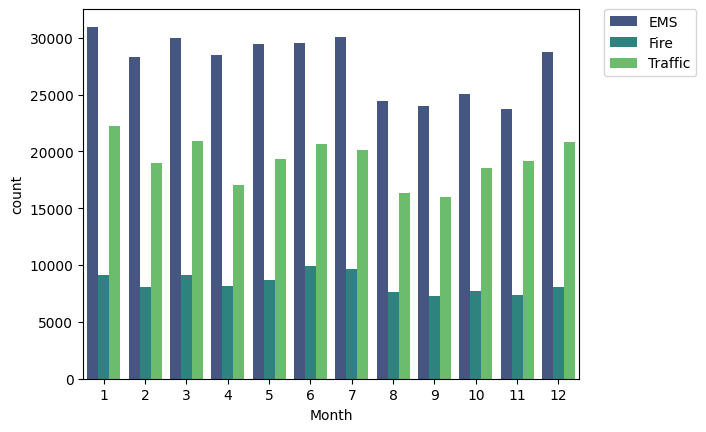

In [45]:
sns.countplot(x='Month', data=df, hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)  # Ajuste a posição da legenda conforme necessário

**Você notou algo estranho no Plot?**
_____
Você deve ter notado que estavam faltando alguns meses. Vejamos se podemos talvez preencher essa informação ao traçar as informações de outra forma, possivelmente um plot de linha simples que preencha os meses que faltam. Para fazer isso, precisamos trabalhar com pandas...

**Agora, crie um objeto groupby chamado "byMonth", onde você agrupa o DataFrame pela coluna do mês e use o método count() para agregação. Use o método head() neste DataFrame retornado.**

In [50]:
byMonth = df.groupby("Month").count()
byMonth.head(12)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509
6,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034,60034
7,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832,59832
8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359
9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213


Observe que o valor em cada linha representa a quantidade de informações coletadas em determinado mês. Esse valor deveria ser igual para todas as colunas de uma mesma linha, visto que uma chamada 911 deve conter todas as informações correspondetes às colunas.
Se os valores diferem de uma coluna para outra, significa que algumas irformações de determinada ocorrência foram perdidas ou não foram coletadas.

**Agora crie um plot simples fora do Dataframe indicando a contagem de chamadas por mês.**

<Axes: xlabel='Month'>

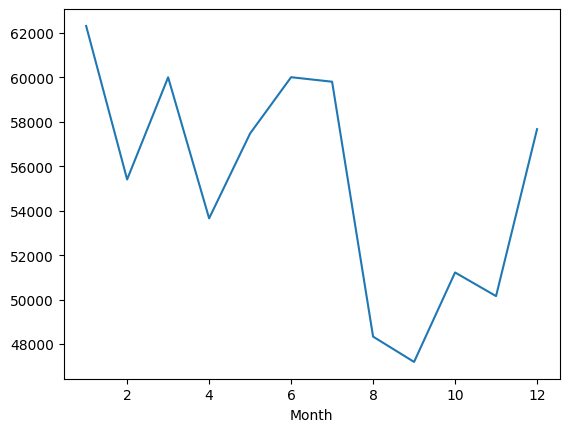

In [54]:
byMonth['twp'].plot() #foi preferível usar o 'twp' pois é um parametro que todas a ocorrências possue

**Agora veja se você pode usar o lmplot () do Seaborn para criar um modelo linear no número de chamadas por mês. Tenha em mente que talvez seja necessário resetar o índice em uma coluna.**

Para usar o lmplot () é necessário os parâmetros x, y e o `conjunto de dados` para criar o plot linear. Se verificarmos o `conjunto de dados(byMonth)` veremos que a 'Month' na verdade é o index do Dataframe. Logo, devemos transformar esse index em uma coluna para colocá-lo no parametro 'x'.

In [55]:
byMonth.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
0,1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
1,2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
2,3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
3,4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
4,5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509
5,6,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034,60034
6,7,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832,59832
7,8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359
8,9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213
9,10,51240,51240,51240,44582,51240,51240,51220,51240,51240,51240,51240,51240


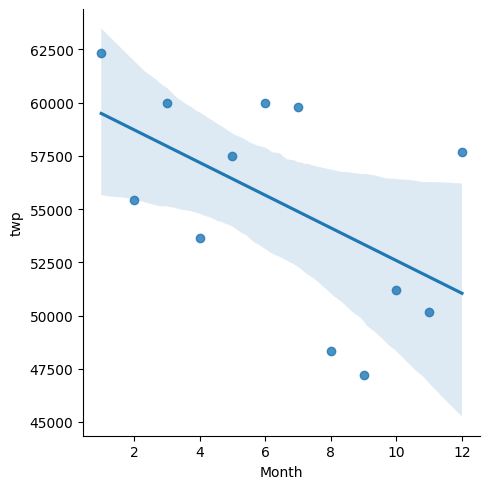

In [57]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

Observe que a área sombreada representa o erro do modelo. Esse erro tende a aumentar com a falta de dados e também com a presença de **outliers**.

**Crie uma nova coluna chamada 'Data' que contenha a data da coluna timeStamp. Você precisará usar .apply() junto com o método .date().**

In [65]:
df['Data'] = df['timeStamp'].apply(lambda x:x.date())

In [66]:
df['Data']

0         2015-12-10
1         2015-12-10
2         2015-12-10
3         2015-12-10
4         2015-12-10
             ...    
663517    2020-07-29
663518    2020-07-29
663519    2020-07-29
663520    2020-07-29
663521    2020-07-29
Name: Data, Length: 663522, dtype: object

Agora os elementos foram agrupados por Data

**Agora agrupe esta coluna Data com o groupby. Usando o count (), crie um gráfico de contagens de chamadas 911.**

In [74]:
df.groupby('Data').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Data,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-25,318,318,318,271,318,318,318,318,318,318,318,318,318
2020-07-26,296,296,296,271,296,296,296,296,296,296,296,296,296
2020-07-27,329,329,329,288,329,329,329,329,329,329,329,329,329


<Axes: xlabel='Data'>

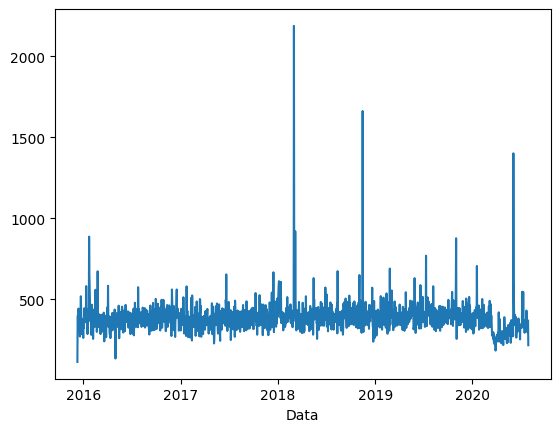

In [75]:
#criar um grafico de chamadas por dia
df.groupby('Data').count()['twp'].plot()

**Agora recrie esse plot, mas crie 3 plots separados com cada plot representando uma Razão para a chamada 911**

<Axes: xlabel='Data'>

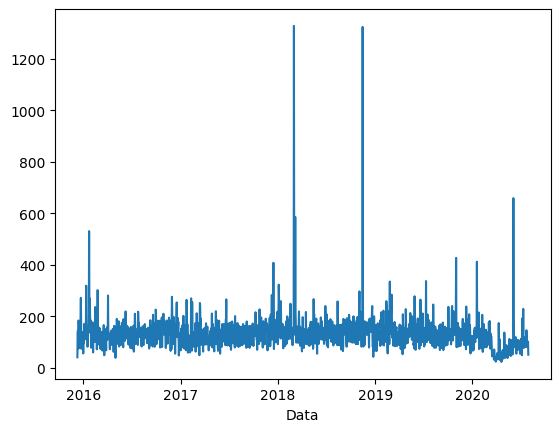

In [76]:
df[df['Reason']=='Traffic'].groupby('Data').count()['twp'].plot()

<Axes: xlabel='Data'>

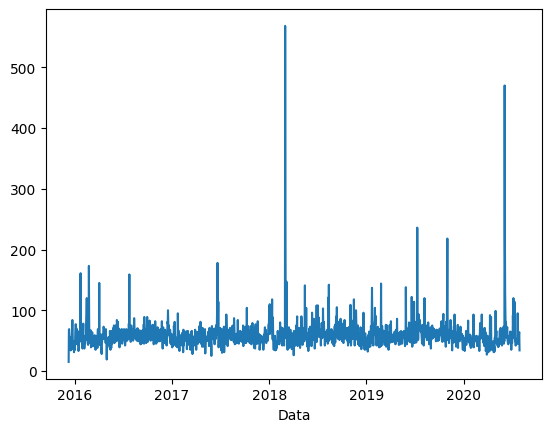

In [77]:
df[df['Reason']=='Fire'].groupby('Data').count()['twp'].plot()

<Axes: xlabel='Data'>

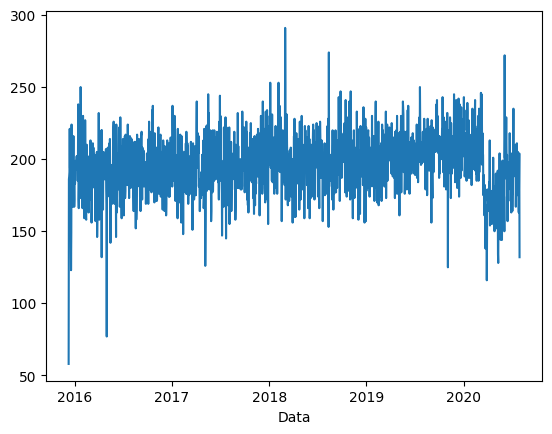

In [78]:
df[df['Reason']=='EMS'].groupby('Data').count()['twp'].plot()

____
**Agora vamos continuar a criar mapas de calor com seaborn e nossos dados. Em primeiro lugar, devemos reestruturar o quadro de dados para que as colunas se tornem horas e o Índice se torne o Dia da Semana. Há muitas maneiras de fazer isso, mas eu recomendaria tentar combinar groupby com o método [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) . Consulte as soluções se você ficar preso nisso!**

In [81]:
#Criando indice multinível
dayHour = df.groupby(by = ['Day of Week', 'Hour']).count()['twp']. unstack()
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1981,1632,1449,1296,1338,1638,2663,4138,5017,5288,...,6392,7038,7064,7112,5667,5055,4373,3912,3421,2828
Mon,1893,1567,1366,1271,1336,1843,2675,4428,5502,5722,...,5713,6289,6341,6407,5440,4488,3823,3252,2654,2069
Sat,2442,2058,1879,1588,1449,1579,1879,2488,3457,4312,...,5420,5181,5210,5211,4979,4748,4125,3893,3224,2961
Sun,2423,2132,1938,1614,1468,1487,1725,2404,3001,3728,...,4744,4475,4559,4505,4402,4133,3747,3158,2627,2321
Thu,1731,1407,1424,1234,1292,1774,2814,4431,5296,5411,...,6078,6493,6374,6933,5510,4701,4043,3490,2844,2351
Tue,1719,1455,1322,1212,1245,1741,2782,4425,5633,5562,...,5923,6251,6494,6877,5625,4618,3843,3408,2706,2133
Wed,1662,1481,1258,1262,1128,1609,2667,4643,5465,5443,...,6068,6532,6743,7061,5690,4684,4113,3530,2825,2204


**Agora crie um mapa de calor usando este DataFrame**

<Axes: xlabel='Month', ylabel='Day of Week'>

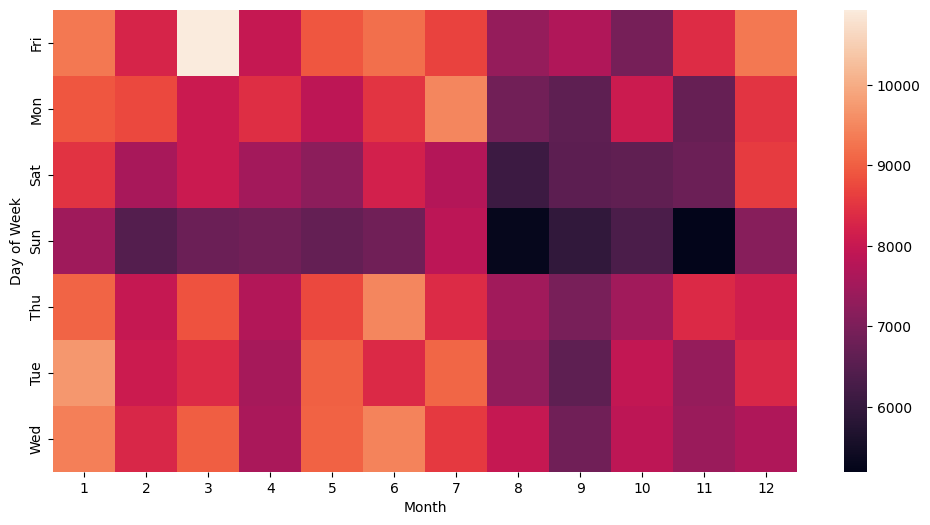

In [91]:
plt.figure(figsize=[12, 6]) #ajustar tamanho
sns.heatmap(dayHour)

**Agora crie um clustermap usando este DataFrame.**

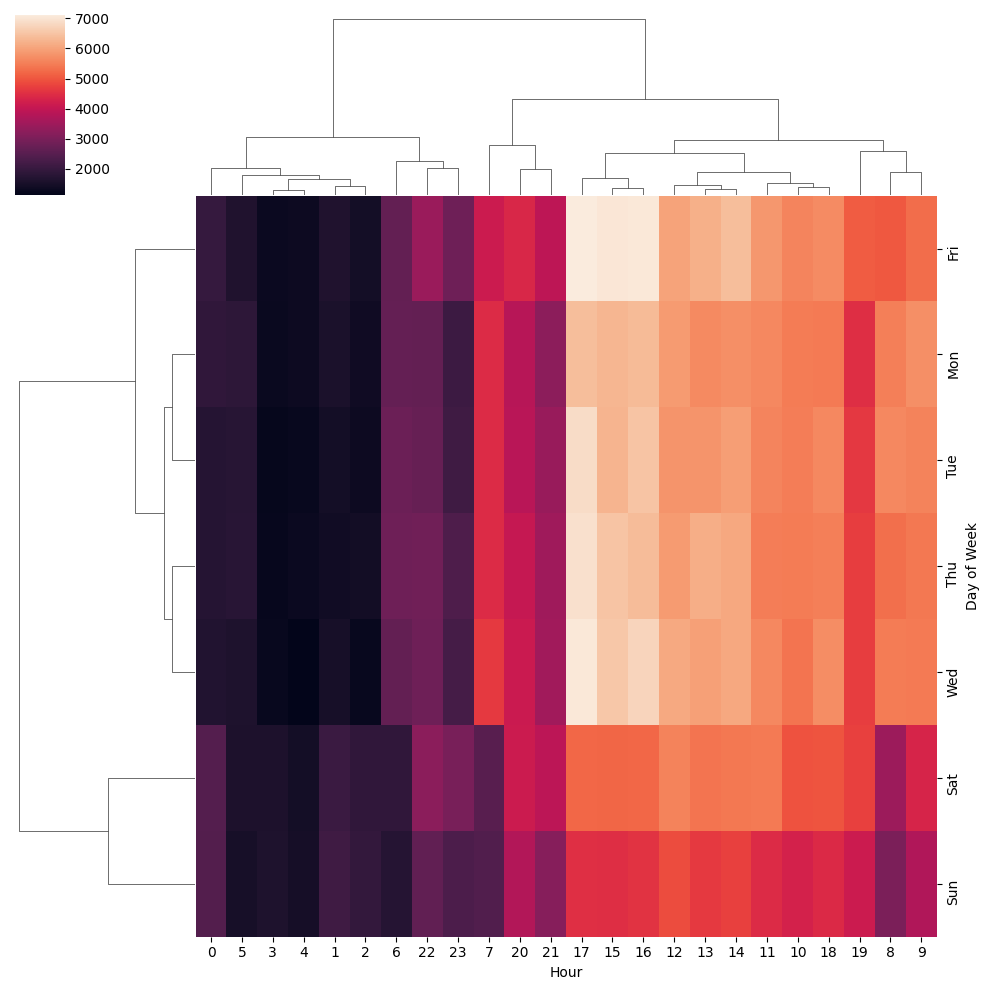

In [86]:
sns.clustermap(dayHour)

**Agora repita estes mesmos plots e operações para um DataFrame que mostra o mês como a coluna.**

In [88]:
dayMonth = df.groupby(by = ['Day of Week', 'Month']).count()['twp']. unstack()

<Axes: xlabel='Month', ylabel='Day of Week'>

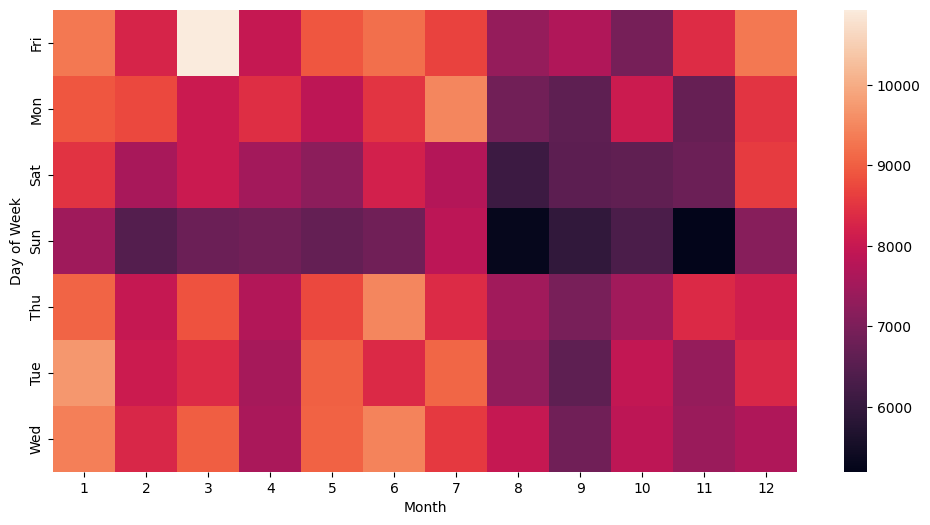

In [89]:
plt.figure(figsize=[12, 6])
sns.heatmap(dayMonth)

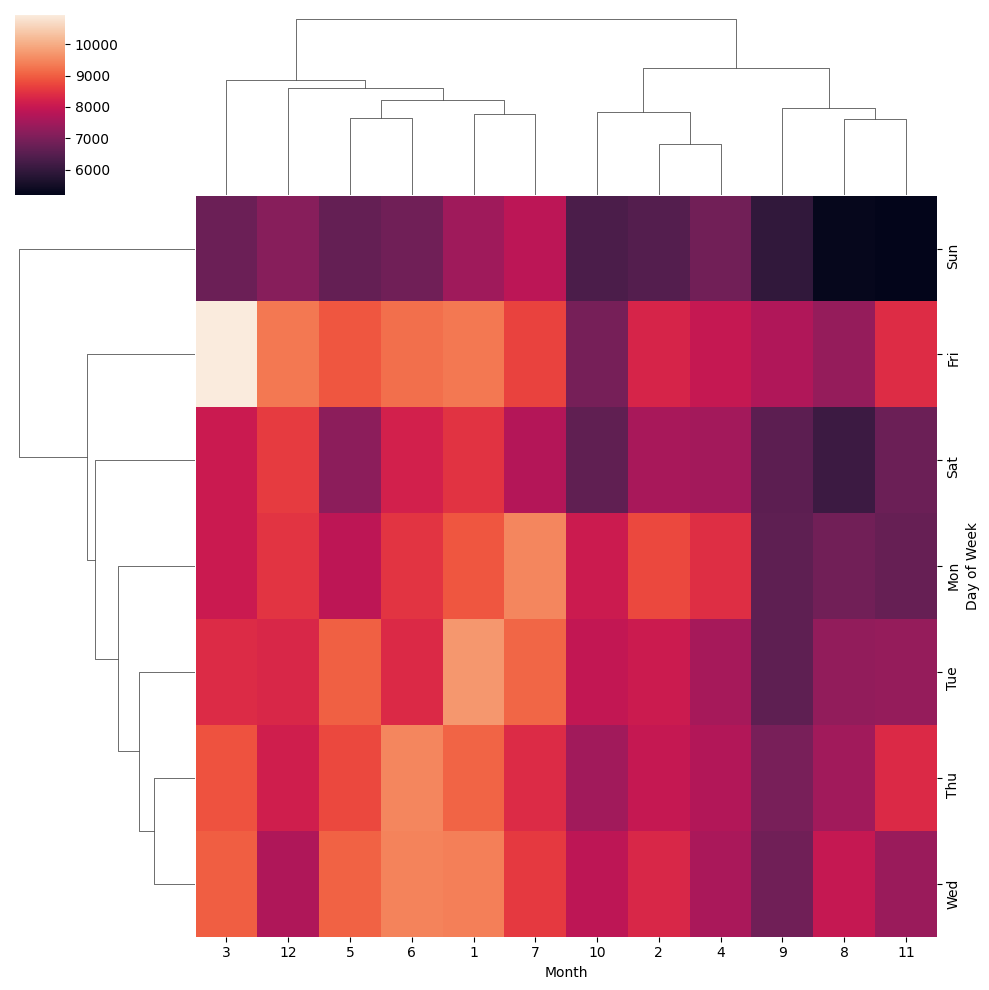

In [90]:
sns.clustermap(dayMonth)